# Dog vs Cat classification

In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

## The dataset
www.kaggle.com/c/dogs-vs-cats/data

I will only use a subset of the data. A training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

In [0]:
!wget -c https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2019-10-17 16:29:41--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.93.0.142, 2600:1417:76:49f::e59, 2600:1417:76:495::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.93.0.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  31.0MB/s    in 28s     

2019-10-17 16:30:10 (27.7 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [0]:
!unzip -qq kagglecatsanddogs_3367a.zip -d Cat_Dog

## 1-Preparing data into different directories

In [0]:
import os, shutil


original_dataset_dir = '/content/Cat_Dog/PetImages'

!rm -r data_processed
base_dir = '/content/data_processed'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['{}.jpg'.format(i) for i in range(1001) if i!=666]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'Dog', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

rm: cannot remove 'data_processed': No such file or directory


This is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success.

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir))) 
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## 2- Building the network
The convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## 3- Configuring the model for training

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 4- Data preprocessing

Modifying image files on disk into batches of preprocessed tensors.

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## 5- Fitting the model


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 16s 165ms/step - loss: 0.6914 - acc: 0.5270 - val_loss: 0.6749 - val_acc: 0.5910
Epoch 2/30
100/100 [==============================] - 10s 101ms/step - loss: 0.6666 - acc: 0.6005 - val_loss: 0.6462 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 10s 101ms/step - loss: 0.6270 - acc: 0.6560 - val_loss: 0.6193 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 10s 101ms/step - loss: 0.5890 - acc: 0.6855 - val_loss: 0.5957 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 10s 100ms/step - loss: 0.5445 - acc: 0.7250 - val_loss: 0.5814 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 10s 101ms/step - loss: 0.5080 - acc: 0.7430 - val_loss: 0.5766 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 10s 103ms/step - loss: 0.4865 - acc: 0.7620 - val_loss: 0.5939 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 1

## 6- Save model

In [0]:
model.save('cats_and_dogs_small_1.h5')

## 7- Plot loss/accuracy

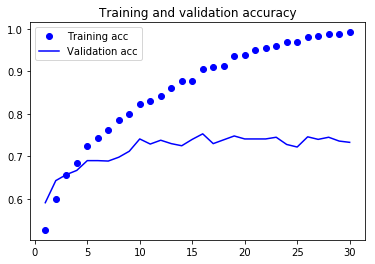

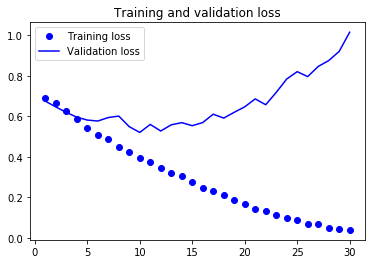

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.

## 8- Using data augmentation to mitigate overfitting

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Display some randomly augmented training images

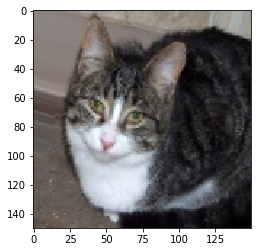

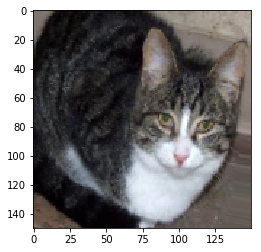

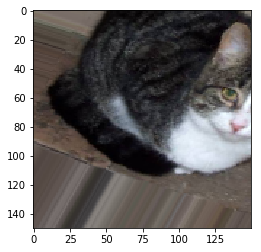

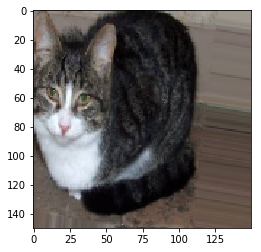

In [0]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
  
# Choose an image to augment
img_path = fnames[4]

img = image.load_img(img_path, target_size=(150, 150))

# Converts it to a Numpy array with shape (150, 150, 3) 
x = image.img_to_array(img) 

# Reshapes it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape) 

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
    
    
# Note that the validation data shouldn't be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 34s 340ms/step - loss: 0.6895 - acc: 0.5219 - val_loss: 0.6610 - val_acc: 0.6047
Epoch 2/100
100/100 [==============================] - 31s 307ms/step - loss: 0.6721 - acc: 0.5803 - val_loss: 0.6964 - val_acc: 0.5206
Epoch 3/100
100/100 [==============================] - 30s 302ms/step - loss: 0.6502 - acc: 0.6000 - val_loss: 0.6266 - val_acc: 0.6466
Epoch 4/100
100/100 [==============================] - 31s 310ms/step - loss: 0.6335 - acc: 0.6328 - val_loss: 0.6007 - val_acc: 0.6836
Epoch 5/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6186 - acc: 0.6525 - val_loss: 0.5846 - val_acc: 0.6834
Epoch 6/100
100/100 [==============================] - 33s 325ms/step - loss: 0.5973 - acc: 0.6706 - val_loss: 0.5766 - val_acc: 0.6856
Epoch 7/100
100/100 [==============================] - 31s 308ms/step - loss: 0.5986 - acc: 0.6828 -

In [0]:
model.save('cats_and_dogs_small_2.h5')

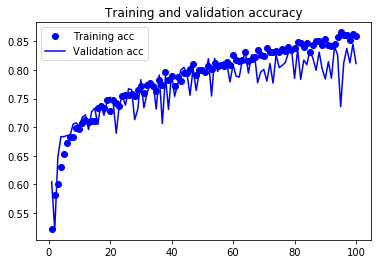

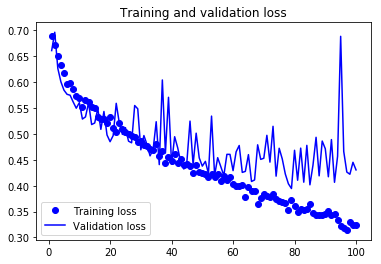

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Thanks to data augmentation and dropout, model is no longer overfitting: the training curves are closely tracking the validation curves. 

Reached an accuracy of 82%, a 15% relative improvement over the non-regularized model.